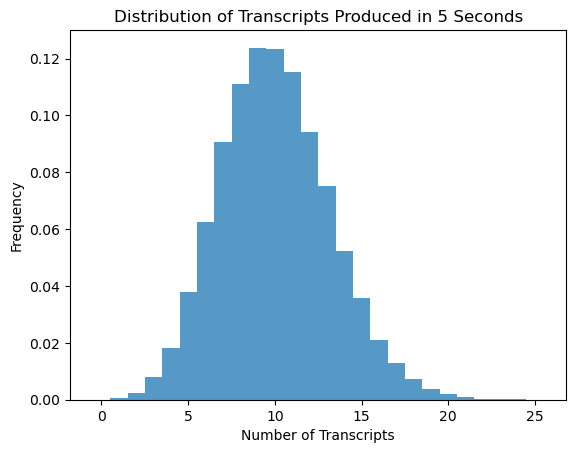

In [26]:
import numpy as np
import matplotlib.pyplot as plt
rate = 2  
num_simulations = 10**5  

# Generate time vectors 
def time_vector(rate):
    transcript_count = 0
    time = 0

    while time <= 5:
        time += np.random.exponential(scale=1/rate)
        transcript_count += 1

    return transcript_count - 1

# Perform Monte Carlo simulation
transcripts_counts = [time_vector(rate) for _ in range(num_simulations)]

# Plot the histogram
plt.hist(transcripts_counts, bins=np.arange(max(transcripts_counts) + 2) - 0.5, density=True, alpha=0.75)
plt.xlabel('Number of Transcripts')
plt.ylabel('Frequency')
plt.title('Distribution of Transcripts Produced in 5 Seconds')
plt.show()


In [27]:
mean_value1=np.mean(transcripts_counts)
print(mean_value1)
variance_value1=np.var(transcripts_counts)
print(variance_value1)

10.01807
10.0498234751


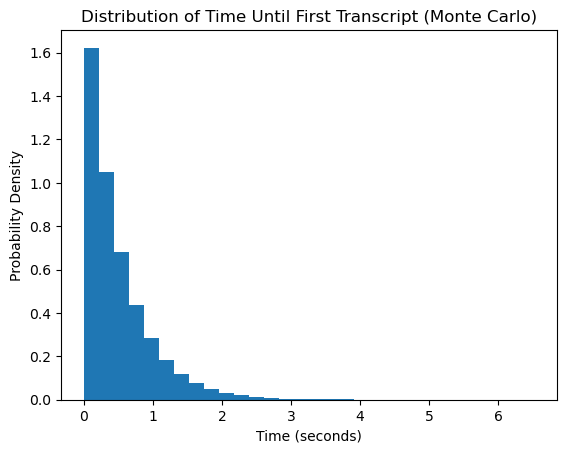

In [7]:
rate=2
num_samples = 1000000
times=np.random.exponential(scale=1/rate, size = num_samples)
plt.hist(times, bins=30, density=True)
plt.xlabel('Time (seconds)')
plt.ylabel('Probability Density')
plt.title('Distribution of Time Until First Transcript (Monte Carlo)')
plt.show()

In [8]:
probability = np.mean(samples > 1)
probability

0.999513

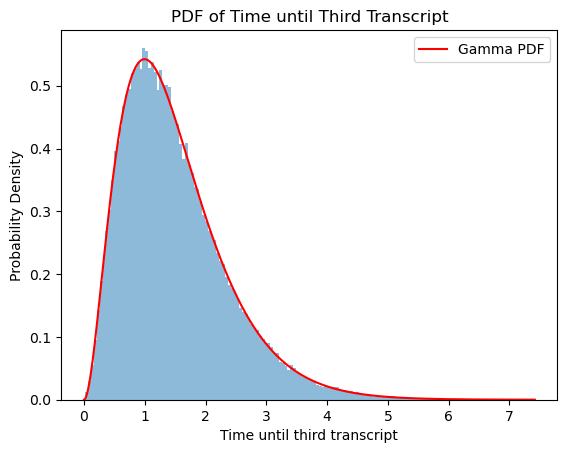

Estimated probability: 0.32491


In [44]:
from scipy.stats import gamma
rate = 2
num_trials = 100000

# Function to simulate time until the third transcript
def time_vector(rate):
    times = []
    transcript_count = 0
    time = 0

    while transcript_count < 3:
        time += np.random.exponential(scale=1/rate)
        transcript_count += 1
        times.append(time)

    return times[-1]

# Simulate the time until the third transcript in each trial
times = [time_vector(rate) for _ in range(num_trials)]

# Fit gamma distribution to the data
shape, loc, scale = gamma.fit(times, floc=0)

# Generate data for the PDF plot
x = np.linspace(0, max(times), 1000)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.hist(times, bins='auto', density=True, alpha=0.5)
plt.plot(x, pdf, 'r', label='Gamma PDF')
plt.xlabel('Time until third transcript')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PDF of Time until Third Transcript')
plt.show()
count = sum(time <= 1 for time in times)
probability = count / num_trials
print("Estimated probability:", probability)
